In [ ]:
import pandas as pd
hdp = pd.read_csv('/content/Heart_Disease_Prediction.csv')# Dropping null values
hdp = hdp.dropna()
hdp.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0         7      Presence  
3                        1         7       Absence  
4                        1         3       Absence

In [ ]:
hdp['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
X = hdp.drop('Heart Disease',axis=1)
y = hdp['Heart Disease']

In [ ]:
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

[0.06948973 0.04171892 0.11406206 0.07086236 0.06108475 0.01857481
 0.03874684 0.07664212 0.07122116 0.08117802 0.06258397 0.12368003
 0.17015522]


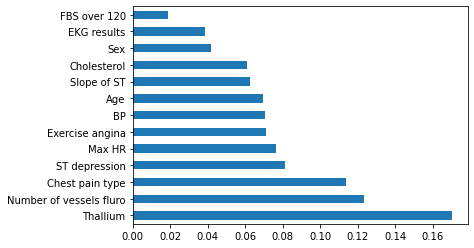

In [ ]:
model = ExtraTreesClassifier()
model.fit(X ,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [ ]:
hdp.drop(['FBS over 120', 'EKG results', 'Sex'], axis = 1, inplace = True)

In [ ]:
a = hdp.drop('Heart Disease',axis=1)
b = hdp['Heart Disease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(a,b,test_size=0.2)
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train,y_train)
rf = RandomForestClassifier()
rf.fit(X_over,y_over)
preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))

0.8518518518518519


In [ ]:
import joblib
joblib.dump(rf, 'hdp_model.pkl') 

['hdp_model.pkl']

In [ ]:
hdp.head()

Age  Chest pain type   BP  Cholesterol  Max HR  Exercise angina  \
0   70                4  130          322     109                0   
1   67                3  115          564     160                0   
2   57                2  124          261     141                0   
3   64                4  128          263     105                1   
4   74                2  120          269     121                1   

   ST depression  Slope of ST  Number of vessels fluro  Thallium Heart Disease  
0            2.4            2                        3         3      Presence  
1            1.6            2                        0         7       Absence  
2            0.3            1                        0         7      Presence  
3            0.2            2                        1         7       Absence  
4            0.2            1                        1         3       Absence

In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
